In [95]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image

In [9]:
tutu = Path('data') / 'TrainingSetImagesDir'

In [10]:
for file in tutu.iterdir():
    print(file)

data/TrainingSetImagesDir/im_150_55.png
data/TrainingSetImagesDir/im_234_6.png
data/TrainingSetImagesDir/im_185_12.png
data/TrainingSetImagesDir/im_471_32.png
data/TrainingSetImagesDir/im_218_48.png
data/TrainingSetImagesDir/im_203_42.png
data/TrainingSetImagesDir/im_100_24.png
data/TrainingSetImagesDir/im_318_15.png
data/TrainingSetImagesDir/im_200_47.png
data/TrainingSetImagesDir/im_73_22.png
data/TrainingSetImagesDir/im_38_50.png
data/TrainingSetImagesDir/im_18_10.png
data/TrainingSetImagesDir/im_16_6.png
data/TrainingSetImagesDir/im_577_6.png
data/TrainingSetImagesDir/im_38_15.png
data/TrainingSetImagesDir/im_75_44.png
data/TrainingSetImagesDir/im_282_32.png
data/TrainingSetImagesDir/im_108_48.png
data/TrainingSetImagesDir/im_140_40.png
data/TrainingSetImagesDir/im_36_31.png
data/TrainingSetImagesDir/im_188_51.png
data/TrainingSetImagesDir/im_30_36.png
data/TrainingSetImagesDir/im_283_31.png
data/TrainingSetImagesDir/im_60_7.png
data/TrainingSetImagesDir/im_400_48.png
data/Training

In [27]:
tutu = Path('data')

In [28]:
for file in tutu.iterdir():
    print(file)

data/TrainingSetImagesDir.zip
data/Mauna_Kea_Supp_Material.zip
data/TrainingSetImagesDir
data/TrainingSet_20aimVO.csv
data/additionnal_material
data/test_data_order.csv
data/TestSetImagesDir_fw4nYmL.zip
data/.ipynb_checkpoints


In [46]:
tutu = Path('data') / 'TrainingSet_20aimVO.csv'
df_y = pd.read_csv(tutu)

In [47]:
df_y.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [48]:
my_f = lambda x:x.split('.')[0]
df_y.image_filename = df_y.image_filename.apply(my_f)
df_y.set_index('image_filename', inplace=True)
df_y.head()

,class_number
image_filename,
im_4_0,0
im_21_0,0
im_9_0,0
im_8_0,0
im_15_0,0


In [49]:
tutu = Path('data') / 'TrainingSetImagesDir'

In [50]:
image_names = [str(file.stem) for file in tutu.iterdir()]

In [52]:
image_names[:5]

['im_150_55', 'im_234_6', 'im_185_12', 'im_471_32', 'im_218_48']

In [59]:
df_y.loc[image_names[155]]

class_number    1
Name: im_116_32, dtype: int64

In [124]:
image_full_name = [file for file in tutu.iterdir()]

In [125]:
image_full_name[:5]

[PosixPath('data/TrainingSetImagesDir/im_150_55.png'),
 PosixPath('data/TrainingSetImagesDir/im_234_6.png'),
 PosixPath('data/TrainingSetImagesDir/im_185_12.png'),
 PosixPath('data/TrainingSetImagesDir/im_471_32.png'),
 PosixPath('data/TrainingSetImagesDir/im_218_48.png')]

In [137]:
image_3 = plt.imread(str(image_full_name[3]), format='png')

In [127]:
image_3.shape

(519, 521, 3)

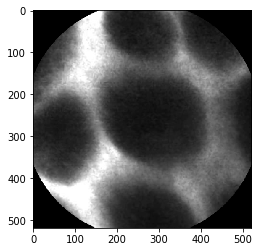

In [128]:
plt.imshow(image_3)

0


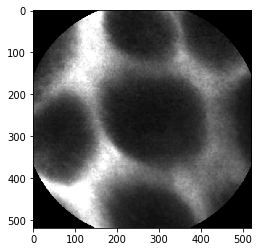

1


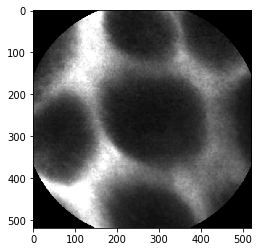

2


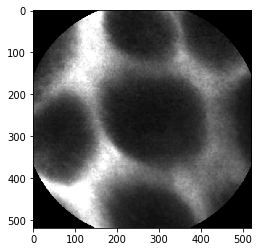

In [130]:
for couche_vba in range(3):
    print(couche_vba)
    fig, ax = plt.subplots()
    ax.imshow(image_3[:,:,couche_vba], cmap='gray')
    plt.show()

In [116]:
x_max, y_max, nb_layer = image_3.shape

In [122]:
# vérifier qu'on a 3 fois la même info

print(f'couche 0 == couche 1 ? : {np.all(image_3[:,:,0] == image_3[:,:,1])}')
print(f'couche 1 == couche 2 ? : {np.all(image_3[:,:,1] == image_3[:,:,2])}')

couche 0 == couche 1 ? : True
couche 1 == couche 2 ? : True


même problème avec PIL

On vérifie que toutes les images ont la même taille, 3 couches, et que les couhces sont redondantes

In [140]:
def redundant_layers(image):
    res_bool = []
    for layer in range(image.shape[2]):
        ma_boule = np.all(image[:,:,0] == image[:,:,layer])
        res_bool.append(ma_boule)
    
    return all(res_bool)

In [141]:
redundant_layers(image_3)

True

In [149]:
my_sizes = []
my_redundancy = []
my_vals = []

for image in image_full_name:
    image = plt.imread(str(image))
    my_sizes.append(image.shape)
    my_redundancy.append(redundant_layers(image))
    my_vals.append((np.min(image), np.max(image)))

In [150]:
set(my_sizes)

{(519, 521, 3)}

In [151]:
all(my_redundancy)

True

In [152]:
set(my_vals)

{(0.0, 0.1254902),
 (0.0, 0.23529412),
 (0.0, 0.26666668),
 (0.0, 0.31764707),
 (0.0, 0.40392157),
 (0.0, 0.45882353),
 (0.0, 0.4627451),
 (0.0, 0.48235294),
 (0.0, 0.54509807),
 (0.0, 0.5882353),
 (0.0, 0.5921569),
 (0.0, 0.59607846),
 (0.0, 0.60784316),
 (0.0, 0.6156863),
 (0.0, 0.6784314),
 (0.0, 0.69803923),
 (0.0, 0.7019608),
 (0.0, 0.7372549),
 (0.0, 0.7529412),
 (0.0, 0.77254903),
 (0.0, 0.7882353),
 (0.0, 0.7921569),
 (0.0, 0.79607844),
 (0.0, 0.8),
 (0.0, 0.80784315),
 (0.0, 0.8117647),
 (0.0, 0.81960785),
 (0.0, 0.83137256),
 (0.0, 0.8352941),
 (0.0, 0.84313726),
 (0.0, 0.84705883),
 (0.0, 0.85490197),
 (0.0, 0.85882354),
 (0.0, 0.8627451),
 (0.0, 0.87058824),
 (0.0, 0.8745098),
 (0.0, 0.8784314),
 (0.0, 0.88235295),
 (0.0, 0.8862745),
 (0.0, 0.89411765),
 (0.0, 0.8980392),
 (0.0, 0.90588236),
 (0.0, 0.9098039),
 (0.0, 0.9137255),
 (0.0, 0.91764706),
 (0.0, 0.92156863),
 (0.0, 0.9254902),
 (0.0, 0.92941177),
 (0.0, 0.93333334),
 (0.0, 0.9372549),
 (0.0, 0.9411765),
 (0.0, 0.9

In [148]:
np.max(image)

1.0

In [134]:
image_3 = Image.open(image_full_name[3])

In [103]:
image_3.__dict__

{'im': None,
 'mode': 'RGB',
 '_size': (521, 519),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 1,
 'pyaccess': None,
 '_min_frame': 0,
 'tile': [('zip', (0, 0, 521, 519), 41, 'RGB')],
 'decoderconfig': (),
 'decodermaxblock': 65536,
 'fp': <_io.BufferedReader name='/home/francoischanel/repoGit/mauna_key/data/TrainingSetImagesDir/im_471_32.png'>,
 'filename': '/home/francoischanel/repoGit/mauna_key/data/TrainingSetImagesDir/im_471_32.png',
 '_exclusive_fp': True,
 'png': <PIL.PngImagePlugin.PngStream at 0x7f553190be48>,
 'text': {},
 '_PngImageFile__idat': 8192}

In [105]:
np.array(image_3).shape

(519, 521, 3)

In [153]:
my_sizes = []
my_redundancy = []
my_vals = []

for image in image_full_name:
    image = Image.open(image)
    image = np.array(image)
    my_sizes.append(image.shape)
    my_redundancy.append(redundant_layers(image))
    my_vals.append((np.min(image), np.max(image)))

In [154]:
set(my_sizes)

{(519, 521, 3)}

In [155]:
all(my_redundancy)

True

In [157]:
set(my_vals)

{(0, 32),
 (0, 60),
 (0, 68),
 (0, 81),
 (0, 103),
 (0, 117),
 (0, 118),
 (0, 123),
 (0, 139),
 (0, 150),
 (0, 151),
 (0, 152),
 (0, 155),
 (0, 157),
 (0, 173),
 (0, 178),
 (0, 179),
 (0, 188),
 (0, 192),
 (0, 197),
 (0, 201),
 (0, 202),
 (0, 203),
 (0, 204),
 (0, 206),
 (0, 207),
 (0, 209),
 (0, 212),
 (0, 213),
 (0, 215),
 (0, 216),
 (0, 218),
 (0, 219),
 (0, 220),
 (0, 222),
 (0, 223),
 (0, 224),
 (0, 225),
 (0, 226),
 (0, 228),
 (0, 229),
 (0, 231),
 (0, 232),
 (0, 233),
 (0, 234),
 (0, 235),
 (0, 236),
 (0, 237),
 (0, 238),
 (0, 239),
 (0, 240),
 (0, 241),
 (0, 242),
 (0, 243),
 (0, 244),
 (0, 245),
 (0, 246),
 (0, 247),
 (0, 248),
 (0, 249),
 (0, 250),
 (0, 251),
 (0, 252),
 (0, 253),
 (0, 254),
 (0, 255)}

> en important avec PIL, on a bien un truc propre en 255 nuances de gris

In [ ]:
my_image = Image.open()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)